In [1]:
import pandas as pd
import numpy as np
import math
import requests
import acquire as a
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pprint import pprint
from vega_datasets import data
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Exercise

### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
df = a.acquire_store()
df.head(3)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [3]:
#now that the date col is in datetime format, we can set it to our index
df = df.set_index('sale_date')
#now, we sort the index
df = df.sort_index()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


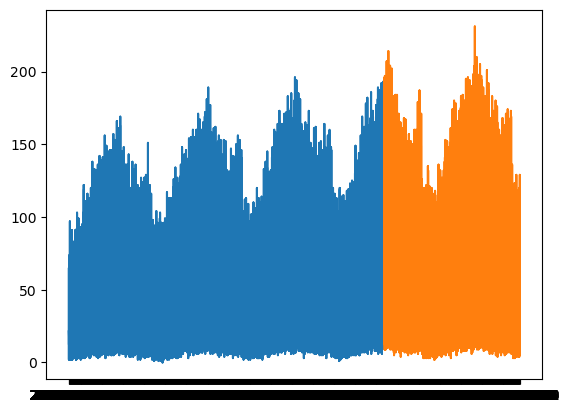

In [4]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.show()

In [5]:
train.to_csv('train.csv', index=True)  # Set index=False if you don't want to save the index
test.to_csv('test.csv', index=True)

In [6]:
germany = a.get_germany_data()
germany.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [7]:
germany = germany.set_index('Date').sort_index()
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [8]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2+ KB


In [9]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train_germany = df[:test_start_index] # everything up (not including) to the test_start_index
test_germany = df[test_start_index:] # everything from the test_start_index to the end

In [10]:
train_germany.to_csv('train_germany.csv', index=True)  # Set index=False if you don't want to save the index
test_germany.to_csv('test_germany.csv', index=True)